In [2]:
heart=pd.read_csv(r"C:\Users\DELL\Music\heart_2022_no_nans.csv")

# Basic libraries used

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [145]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  int64  
 4   MentalHealthDays           246022 non-null  int64  
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  int64  
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [128]:
heart.isnull().sum()

State                        0
Sex                          0
GeneralHealth                0
PhysicalHealthDays           0
MentalHealthDays             0
LastCheckupTime              0
PhysicalActivities           0
SleepHours                   0
RemovedTeeth                 0
HadHeartAttack               0
HadAngina                    0
HadStroke                    0
HadAsthma                    0
HadSkinCancer                0
HadCOPD                      0
HadDepressiveDisorder        0
HadKidneyDisease             0
HadArthritis                 0
HadDiabetes                  0
DeafOrHardOfHearing          0
BlindOrVisionDifficulty      0
DifficultyConcentrating      0
DifficultyWalking            0
DifficultyDressingBathing    0
DifficultyErrands            0
SmokerStatus                 0
ECigaretteUsage              0
ChestScan                    0
RaceEthnicityCategory        0
AgeCategory                  0
HeightInMeters               0
WeightInKilograms            0
BMI     

In [129]:
heart_duplicates = heart.duplicated().sum()    #chking duplicates

In [130]:
heart_cleaned = heart.drop_duplicates()    #drop the duplicated rows

In [14]:

heart_cleaned.duplicated().sum()         #chk if dplicated are presnt or not

0

In [15]:
heart.shape

(246022, 40)

In [146]:
columns = ['State','DeafOrHardOfHearing','LastCheckupTime', 'RemovedTeeth', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking',
           'DifficultyDressingBathing', 'DifficultyErrands', 'ECigaretteUsage', 'ChestScan', 'HIVTesting', 'FluVaxLast12', 'TetanusLast10Tdap']

heart.drop(columns, axis=1, inplace=True)
heart.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,SmokerStatus,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,PneumoVaxEver,HighRiskLastYear,CovidPos
0,Female,Very good,4,0,Yes,9,No,No,No,No,...,Former smoker,"White only, Non-Hispanic",Age 65 to 69,1.60,71.67,27.99,No,Yes,No,No
1,Male,Very good,0,0,Yes,6,No,No,No,No,...,Former smoker,"White only, Non-Hispanic",Age 70 to 74,1.78,95.25,30.13,No,Yes,No,No
2,Male,Very good,0,0,No,8,No,No,No,No,...,Former smoker,"White only, Non-Hispanic",Age 75 to 79,1.85,108.86,31.66,Yes,Yes,No,Yes
3,Female,Fair,5,0,Yes,9,No,No,No,No,...,Never smoked,"White only, Non-Hispanic",Age 80 or older,1.70,90.72,31.32,No,Yes,No,Yes
4,Female,Good,3,15,Yes,5,No,No,No,No,...,Never smoked,"White only, Non-Hispanic",Age 80 or older,1.55,79.38,33.07,No,Yes,No,No


In [84]:
heart.shape

(246022, 26)

In [85]:
heart.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,2.410000,292.570000,97.650000


In [149]:
heart[heart.select_dtypes(include='object').columns] = heart[heart.select_dtypes(include='object').columns].apply(le.fit_transform)

In [87]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Sex                    246022 non-null  int32  
 1   GeneralHealth          246022 non-null  int32  
 2   PhysicalHealthDays     246022 non-null  int64  
 3   MentalHealthDays       246022 non-null  int64  
 4   PhysicalActivities     246022 non-null  int32  
 5   SleepHours             246022 non-null  int64  
 6   HadHeartAttack         246022 non-null  int32  
 7   HadAngina              246022 non-null  int32  
 8   HadStroke              246022 non-null  int32  
 9   HadAsthma              246022 non-null  int32  
 10  HadSkinCancer          246022 non-null  int32  
 11  HadCOPD                246022 non-null  int32  
 12  HadDepressiveDisorder  246022 non-null  int32  
 13  HadKidneyDisease       246022 non-null  int32  
 14  HadArthritis           246022 non-nu

In [22]:
heart.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,SmokerStatus,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,PneumoVaxEver,HighRiskLastYear,CovidPos
0,0,4,4,0,1,9,0,0,0,0,...,2,4,9,1.60,71.67,27.99,0,1,0,0
1,1,4,0,0,1,6,0,0,0,0,...,2,4,10,1.78,95.25,30.13,0,1,0,0
2,1,4,0,0,0,8,0,0,0,0,...,2,4,11,1.85,108.86,31.66,1,1,0,2
3,0,1,5,0,1,9,0,0,0,0,...,3,4,12,1.70,90.72,31.32,0,1,0,2
4,0,2,3,15,1,5,0,0,0,0,...,3,4,12,1.55,79.38,33.07,0,1,0,0


In [23]:
heart.HadHeartAttack.value_counts()  #HadHeartAttack" as binary 
#("Yes" - respondent had heart disease-----------> 1;
#"No" - respondent did not have heart disease ---------> 0"

HadHeartAttack
0    232587
1     13435
Name: count, dtype: int64

# EDA

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Sex', ylabel='count'>

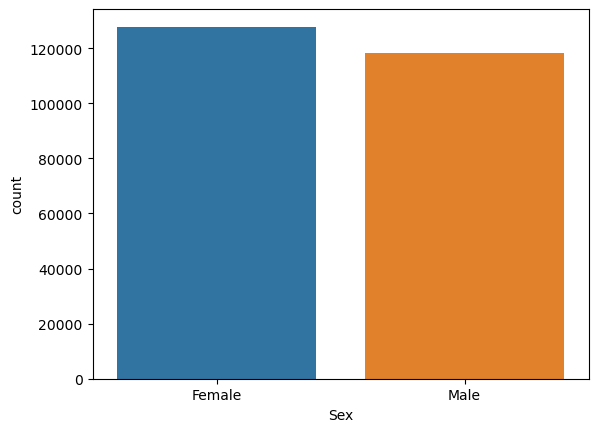

In [6]:
sns.countplot(heart,x=heart['Sex'])

#The count for ‘Female’ is over 100,000, while the count for ‘Male’ 
#is slightly less but more than 80,000

In [8]:
#Focusing only on the Heart Attack cases
heart_df=heart.loc[heart['HadHeartAttack']=='Yes']
print(heart_df.shape)
heart_df.head()

(13435, 40)


,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
7,Alabama,Male,Fair,5,0,Within past year (anytime less than 12 months ...,Yes,8,1 to 5,Yes,...,1.75,74.84,24.37,No,Yes,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
12,Alabama,Male,Good,5,0,Within past year (anytime less than 12 months ...,Yes,5,"6 or more, but not all",Yes,...,1.88,115.67,32.74,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
34,Alabama,Male,Good,0,0,Within past year (anytime less than 12 months ...,Yes,6,1 to 5,Yes,...,1.78,71.67,22.67,No,No,Yes,Yes,"Yes, received Tdap",No,No
37,Alabama,Male,Good,3,27,Within past year (anytime less than 12 months ...,Yes,5,"6 or more, but not all",Yes,...,1.85,123.83,36.02,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,Yes
43,Alabama,Male,Good,0,0,Within past year (anytime less than 12 months ...,Yes,8,1 to 5,Yes,...,1.78,95.25,30.13,No,Yes,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No


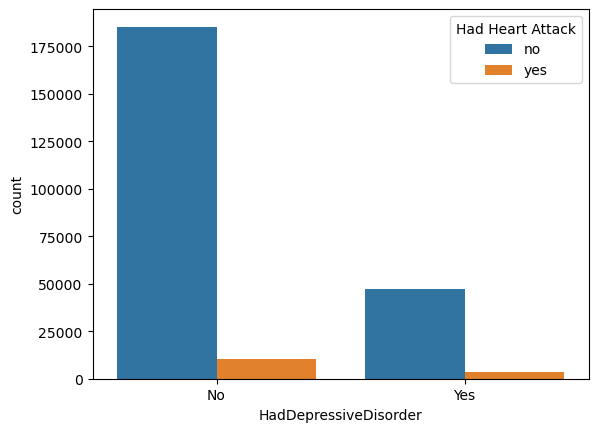

In [28]:
hd = sns.countplot(data=heart, x='HadDepressiveDisorder', hue='HadHeartAttack')
plt.legend(title='Had Heart Attack', loc='upper right', labels=['no', 'yes'])
plt.show()
           

In [12]:
def with_hue(hd, feature, hue_categories):
    totals = feature.value_counts().values
    for i, (p, total) in enumerate(zip(hd.patches, totals)):
        percentage = f"{100 * p.get_height() / total:.1f}%"
        x = p.get_x() + p.get_width() / 2 - 0.15
        y = p.get_y() + p.get_height()
        hd.annotate(percentage, (x, y), size=12)

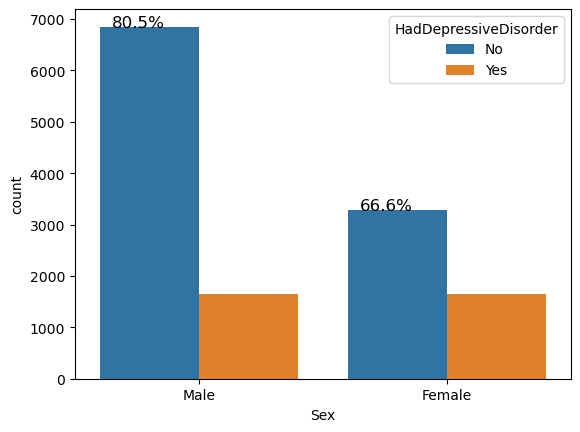

In [27]:
hd = sns.countplot(data=heart_df, x='Sex', hue='HadDepressiveDisorder')
with_hue(hd, heart_df['Sex'], 2)

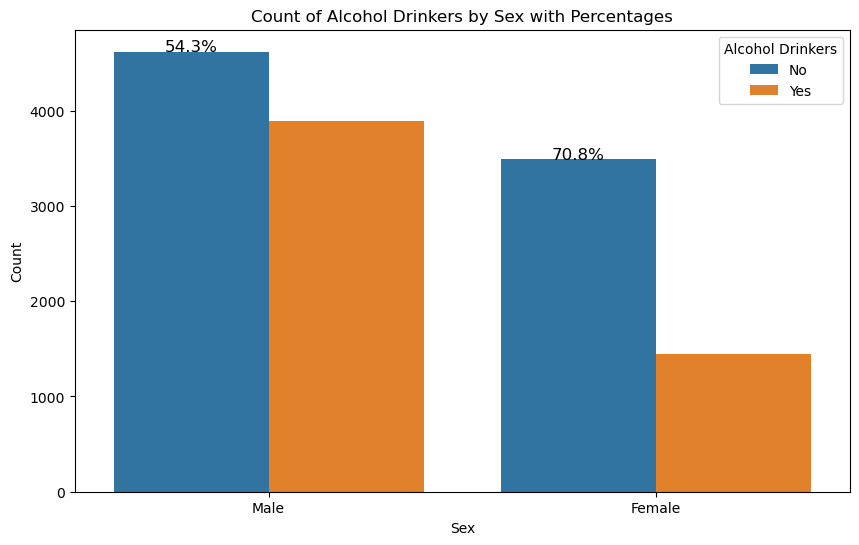

In [37]:
#create the count plot
plt.figure(figsize=(10, 6))
hd = sns.countplot(x='Sex', hue='AlcoholDrinkers', data=heart_df)

# Annotate with percentages using the with_hue function
with_hue(hd, heart_df['Sex'], 2)

# Customize the plot
hd.set_title('Count of Alcohol Drinkers by Sex with Percentages')
hd.set_xlabel('Sex')
hd.set_ylabel('Count')
hd.legend(title='Alcohol Drinkers')

# Show the plot
plt.show()

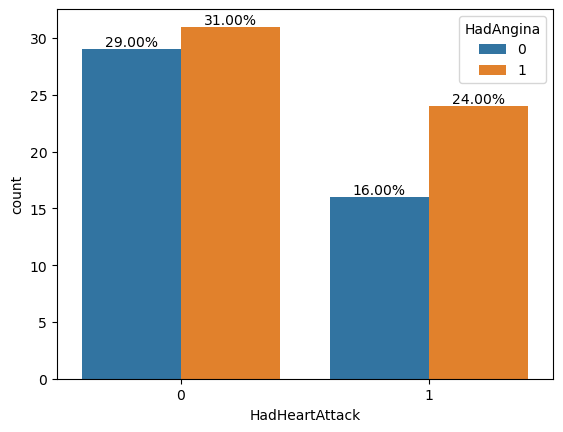

In [173]:
  #Create a count plot
hd = sns.countplot(data=heart, x='HadHeartAttack', hue='HadAngina')

# Calculate the percentage of each category
total_counts = heart['HadHeartAttack'].value_counts()
for p in hd.patches:
    height = p.get_height()
    hd.annotate(f'{height / total_counts.sum() * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
plt.show()

# AGE CATEGORY AND RISK OF GETTING HEART DISEASE

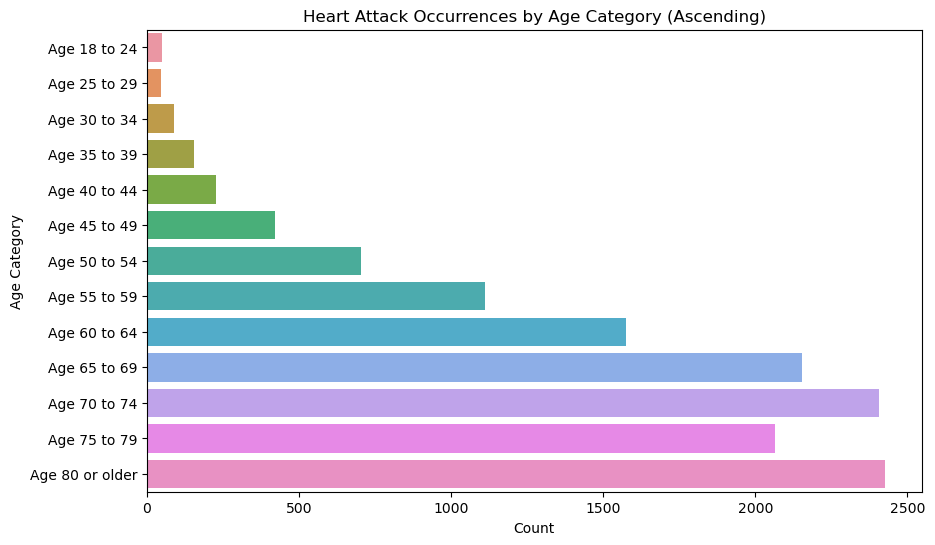

In [62]:
plt.figure(figsize=(10, 6))
sns.countplot(y='AgeCategory', data=heart_df, order=heart_df['AgeCategory'].value_counts().index.sort_values())
plt.xlabel('Count')
plt.ylabel('Age Category')
plt.title('Heart Attack Occurrences by Age Category (Ascending)')
plt.show()

# SMOKING PERCENTAGE IN MALE AND FEMALE

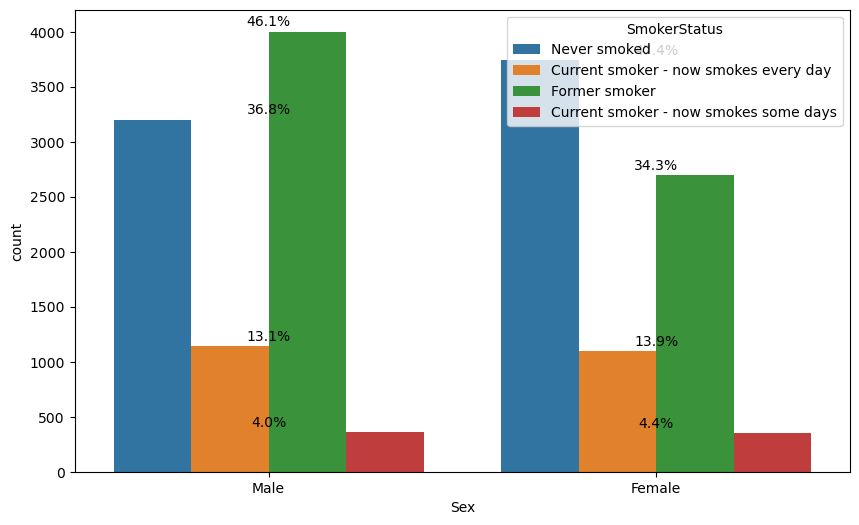

In [9]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create the bar plot
barplot = sns.barplot(x='Sex', y='count', hue='SmokerStatus', data=heart_df)

# Adding percentages on top of the bars
for i in range(df.shape[0]):
    barplot.text(
        x=i//4, y=df['count'][i] + 50, 
        s=f"{df['percentage'][i]}%", 
        ha='center'
    )

# Display the plot
plt.legend(title='SmokerStatus')
plt.show()


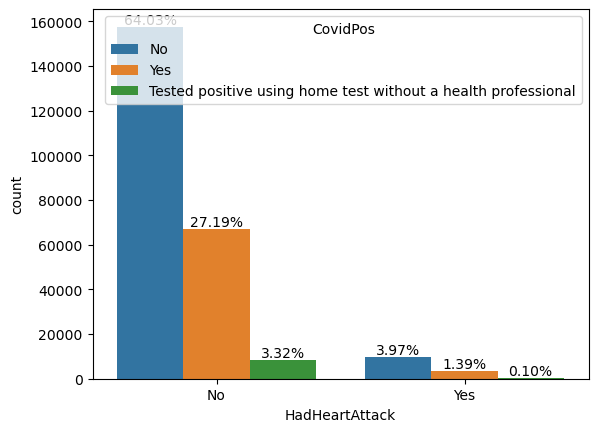

In [5]:
#Create a count plot
hd = sns.countplot(data=heart, x='HadHeartAttack', hue='CovidPos')

# Calculate the percentage of each category
total_counts = heart['HadHeartAttack'].value_counts()
for p in hd.patches:
    height = p.get_height()
    hd.annotate(f'{height / total_counts.sum() * 100:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom')
plt.show()

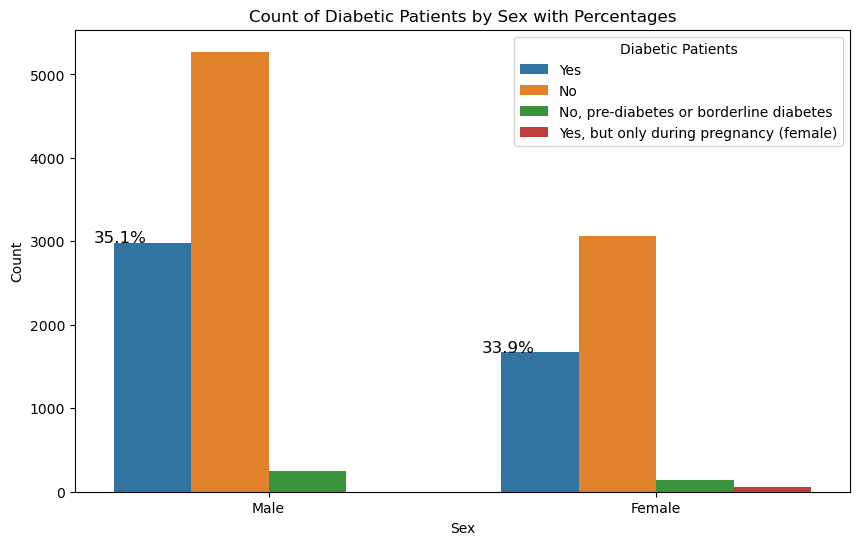

In [14]:
plt.figure(figsize=(10, 6))
hd = sns.countplot(x='Sex', hue='HadDiabetes', data=heart_df)

# Annotate with percentages using the with_hue function
with_hue(hd, heart_df['Sex'], 2)

# Customize the plot
hd.set_title('Count of Diabetic Patients by Sex with Percentages')
hd.set_xlabel('Sex')
hd.set_ylabel('Count')
hd.legend(title='Diabetic Patients')

# Show the plot
plt.show()

# IMPACT OF CHRONIC CONDITIONS

In [168]:
chronic_disease_columns = [
    'HadStroke', 'HadHeartAttack', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
    'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes'
]    #list


In [169]:
# Create a new DataFrame with only the chronic disease columns
chronic_diseases_filtered = chronic_diseases[chronic_disease_columns]

In [170]:
#Print the columns of the new DataFrame to verify
print("Columns in the filtered chronic diseases DataFrame:")
print(chronic_diseases_filtered.columns)


Columns in the filtered chronic diseases DataFrame:
Index(['HadStroke', 'HadHeartAttack', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes'],
      dtype='object')


In [171]:
# Print the count of all unique values for each column in the filtered DataFrame
for column in chronic_diseases_filtered.columns:
    print(f"Counts for column '{column}':")
    print(chronic_diseases_filtered[column].value_counts())
    print("\n")

Counts for column 'HadStroke':
HadStroke
0    52
1    48
Name: count, dtype: int64


Counts for column 'HadHeartAttack':
HadHeartAttack
0    60
1    40
Name: count, dtype: int64


Counts for column 'HadAsthma':
HadAsthma
0    57
1    43
Name: count, dtype: int64


Counts for column 'HadSkinCancer':
HadSkinCancer
1    52
0    48
Name: count, dtype: int64


Counts for column 'HadCOPD':
HadCOPD
0    56
1    44
Name: count, dtype: int64


Counts for column 'HadDepressiveDisorder':
HadDepressiveDisorder
0    55
1    45
Name: count, dtype: int64


Counts for column 'HadKidneyDisease':
HadKidneyDisease
0    58
1    42
Name: count, dtype: int64


Counts for column 'HadArthritis':
HadArthritis
0    54
1    46
Name: count, dtype: int64


Counts for column 'HadDiabetes':
HadDiabetes
1    51
0    49
Name: count, dtype: int64




In [120]:
chronic_diseases = heart[['Sex', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadArthritis', 'HadDiabetes', 'HadKidneyDisease','HadDepressiveDisorder','HadStroke']] 
 

chronic_diseases

,Sex,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadArthritis,HadDiabetes,HadKidneyDisease,HadDepressiveDisorder,HadStroke
0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,1,2,0,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,1,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
246017,1,0,0,0,0,0,0,0,0,0,0,0
246018,0,0,0,0,0,0,0,0,0,0,1,0
246019,1,0,0,1,0,0,0,1,2,0,0,1
246020,0,0,0,0,0,0,0,0,0,0,0,0


# The correlation between each chronic condition with heart disease status

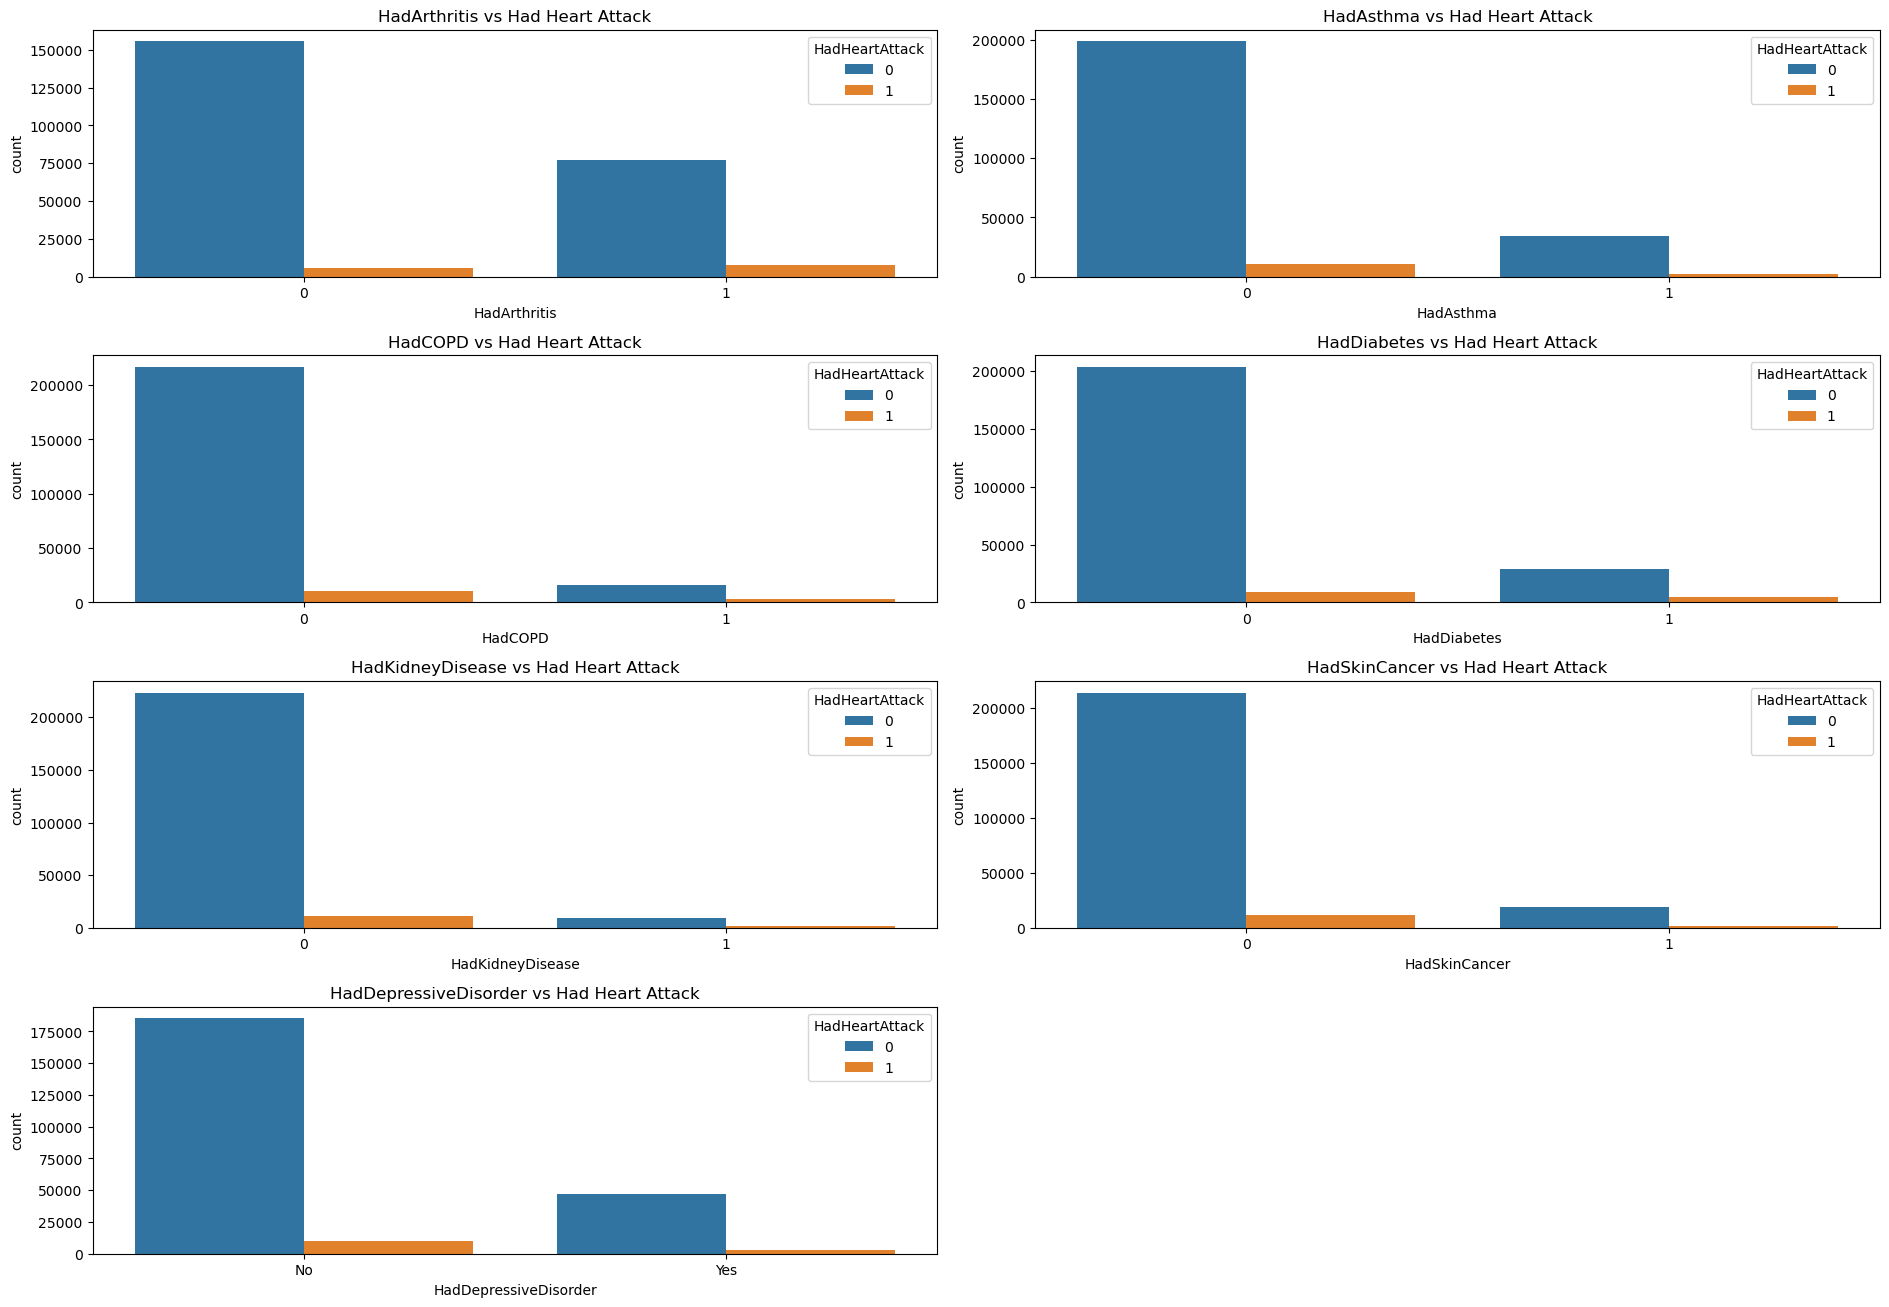

In [65]:
categorical_features = ['HadArthritis', 'HadAsthma', 'HadCOPD','HadDiabetes','HadKidneyDisease','HadSkinCancer','HadDepressiveDisorder','HadStroke']

plt.figure(figsize=(19, 16))
for i, feature in enumerate(categorical_features):
    plt.subplot(5, 2, i+1)  # Adjusted the subplot grid to 3x2
    sns.countplot(x=feature, hue='HadHeartAttack', data=heart)
    plt.title(f'{feature} vs Had Heart Attack')
plt.tight_layout()

#The graphs collectively indicate that having conditions like arthritis, asthma, COPD, diabetes,
#kidney disease,stroke and had disease and skin cancer might increase the risk of having a heart attack.

#Particularly, COPD and diabetes show a strong correlation with the incidence of heart attacks.

#The health conditions could be contributing factors. 
#to the overall cardiovascular health,and 
#managing these conditions might help reduce the risk of heart attacks.

# HEATMAP

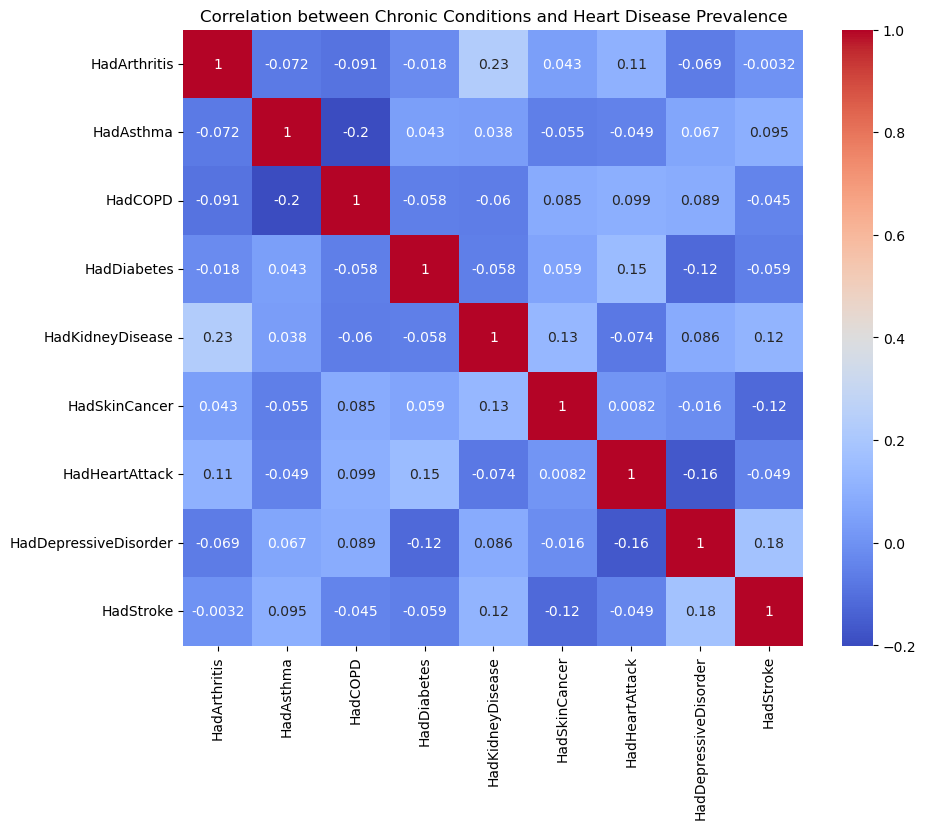

In [153]:
chronic_conditions = ['HadArthritis', 'HadAsthma', 'HadCOPD', 'HadDiabetes', 'HadKidneyDisease', 'HadSkinCancer', 'HadHeartAttack','HadDepressiveDisorder','HadStroke']


# Convert categorical variables to numerical values for correlation analysis
for condition in chronic_conditions:
    if heart[condition].dtype == 'object':
        heart[condition] = heart[condition].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate the correlation matrix
correlation_matrix = heart[chronic_conditions].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between Chronic Conditions and Heart Disease Prevalence')
plt.show()

#Each cell in the heatmap shows how strongly two conditions are related,
#with a correlation of 1 indicating a perfect positive relationship.

#For example, ‘HadHeartAttack’ has a high correlation with itself 
#(1.0) and significant correlations with ‘HadArthritis’ and ‘HadDiabetes’.

#suggesting that these conditions often occur together or may influence each other.
#The color gradient from blue to red indicates increasing levels of correlation.
#with red being higher.

# pie chart

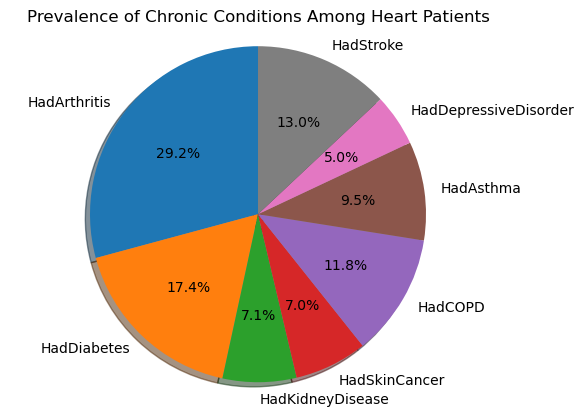

In [64]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'HadArthritis', 'HadDiabetes', 'HadKidneyDisease', 'HadSkinCancer', 'HadCOPD', 'HadAsthma','HadDepressiveDisorder','HadStroke'
sizes = [29.2, 17.4, 7.1, 7.0, 11.8, 9.5, 5.0,13.0]
explode = (0, 0, 0, 0, 0, 0, 0, 0)  # no segment is "exploded" or highlighted

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Prevalence of Chronic Conditions Among Heart Patients')
plt.show()


#Individuals previously having chronic diseases such as COPD(Chronic obstructive pulmonary disease),
#diabetes,Stroke, kidney diseases are more likely to have heart diseases
#as 14.4%, 8.7% ,13% and 21.2% respectively of them are also heart patients.

#Other conditions like arthritis(35.6%), asthma(11.6%), skin cancer(8.5%),HadDepressiveDisorder(5%) 
#also have a chance of developing a heart disease.

#Considering overall heart patients with chronic conditions previously,
#Nearly one third one them had arthiris before, around 21-22% are diabetic

# Behavioral Correlations:

#Explore the relationships between 
#health behaviors(physical activity,sleep,alcohol consumption)

#and the prevalence of heart disease. -Identify key behavioral
#factors that may contribute to cardiovascular health disparitie

In [31]:
behavioral_factors = ['SmokerStatus','AlcoholDrinkers', 'PhysicalActivities']
for factor in behavioral_factors:
    print(heart[factor].value_counts(normalize=True)*100, end = '\n\n')

SmokerStatus
Never smoked                             60.050321
Former smoker                            27.854013
Current smoker - now smokes every day     8.803684
Current smoker - now smokes some days     3.291982
Name: proportion, dtype: float64

AlcoholDrinkers
Yes    54.997927
No     45.002073
Name: proportion, dtype: float64

PhysicalActivities
Yes    77.76459
No     22.23541
Name: proportion, dtype: float64



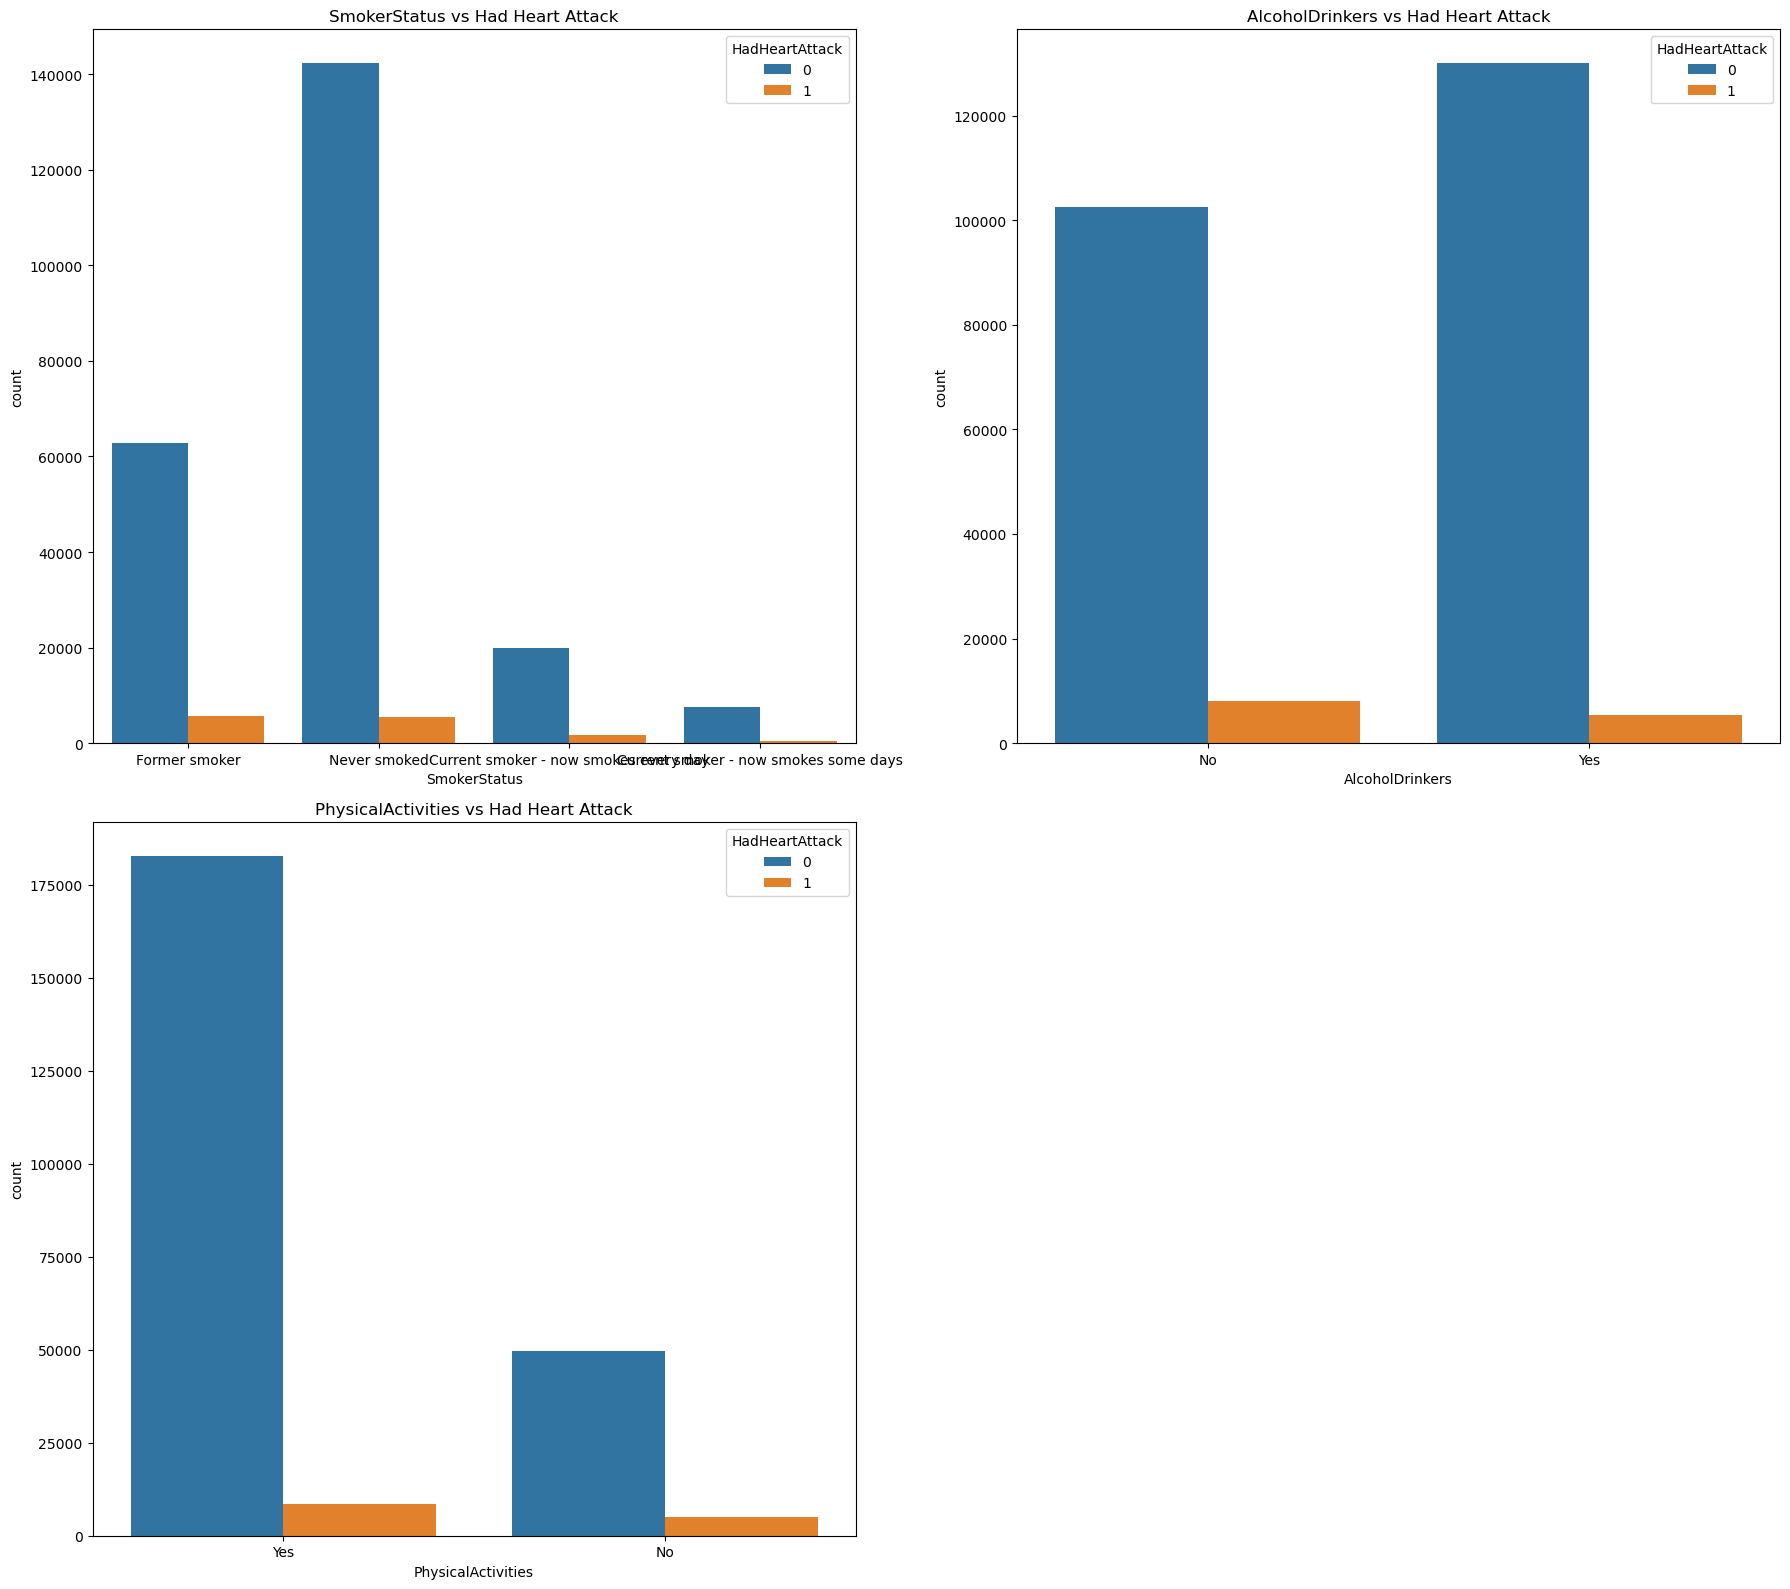

In [60]:
categorical_features = ['SmokerStatus', 'AlcoholDrinkers', 'PhysicalActivities']

plt.figure(figsize=(18, 16))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i+1)  # Adjust the subplot grid as needed
    sns.countplot(x=feature, hue='HadHeartAttack', data=heart)
    plt.title(f'{feature} vs Had Heart Attack')
plt.tight_layout()
plt.show()

#Smoking: Current smoking, especially daily smoking, 
#is strongly associated with an 
#increased risk of heart attacks.

#Alcohol Consumption: The relationship between alcohol consumption
#and heart attacks is not as clear, with similar proportions of heart attacks 
#in both drinkers and non-drinkers.

#Physical Activity: Engaging in physical activities is associated 
#with a significantly lower risk of heart attacks.

In [63]:
heart.columns

Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'PhysicalActivities', 'SleepHours', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'SmokerStatus', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'PneumoVaxEver', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')

# Prevalence of Health Behaviors among Heart Patients with the help of Pie Chart

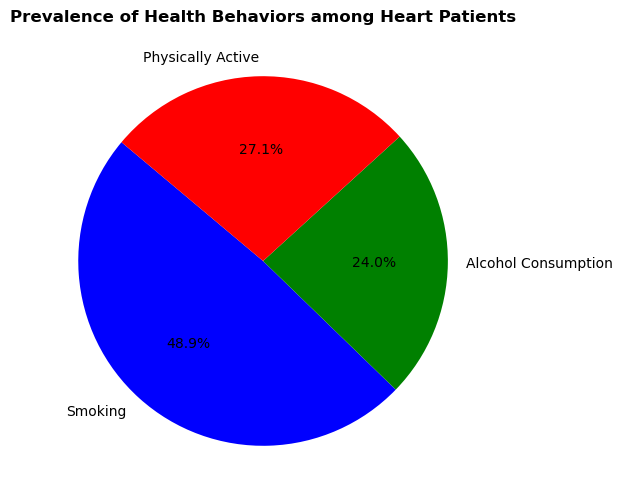

In [62]:
labels = ['Smoking','Alcohol Consumption', 'Physically Active']
sizes = [40.7,  20.0, 22.6]
colors = ['Blue','Green', 'Red']

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Title
plt.title('Prevalence of Health Behaviors among Heart Patients', fontweight='bold')

# Display of the the chart
plt.show()

#Smoking: 48.9% (nearly half) of heart patients smoke, which is a major risk factor.
    
#Physically Active: Only 27.1% of heart patients are physically active, 
#which is a relatively low proportion.

#Alcohol Consumption: 24.0% of heart patients consume alcohol,
#another potential risk factor for heart diseases.

#The data highlights that smoking is the most common unhealthy
#behavior present in this group of heart patients, followed by lack
#of physical activity and alcohol consumption.

# Modelbuilding based on different algorithms

In [90]:
from imblearn.over_sampling import SMOTE


## LOGISTIC REGRESSION

In [91]:
# Assuming 'heart' is your DataFrame and 'HadHeartAttack' is your target variable
X = heart.drop(columns=['HadHeartAttack'])
y = heart['HadHeartAttack']

In [92]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [93]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [94]:
# Initialize and fit the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=10000)
logreg.fit(X_train_smote, y_train_smote)

LogisticRegression(max_iter=10000, random_state=42)

In [95]:
# Predict class labels for the test set
pred_test = logreg.predict(X_test)

In [96]:
y_probs_logreg = logreg.predict_proba(X_test)[:, 1]
y_pred_logreg = logreg.predict(X_test)

In [97]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve, auc

In [98]:
# Calculate FPR, TPR, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_logreg)


In [99]:
# Compute AUC
roc_auc = auc(fpr, tpr)


In [100]:
from sklearn.metrics import confusion_matrix ,recall_score,precision_score,accuracy_score,f1_score,classification_report

In [101]:
confusion_matrix(y_test,pred_test)

array([[37443,  9130],
       [  999,  1633]], dtype=int64)

In [102]:
accuracy_score(y_test,pred_test)*100

79.41469362869627

In [103]:
recall_score(y_test,pred_test)*100

62.044072948328264

In [104]:
precision_score(y_test,pred_test)*100

15.172349716621762

In [105]:
f1_score(y_test,pred_test)*100

24.382232176185145

In [106]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88     46573
           1       0.15      0.62      0.24      2632

    accuracy                           0.79     49205
   macro avg       0.56      0.71      0.56     49205
weighted avg       0.93      0.79      0.85     49205



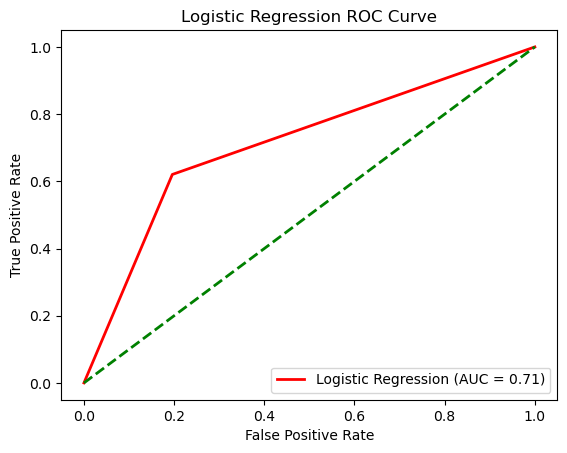

In [107]:
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

# DECISION TREE

In [108]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()


In [109]:
dt.fit(X_train_smote, y_train_smote)
pred_dt = dt.predict(X_test)

print(confusion_matrix(y_test,pred_dt))
print(classification_report(y_test, pred_dt))

[[41916  4657]
 [ 1688   944]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.93     46573
           1       0.17      0.36      0.23      2632

    accuracy                           0.87     49205
   macro avg       0.56      0.63      0.58     49205
weighted avg       0.92      0.87      0.89     49205



## RANDOM FOREST

In [110]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [111]:
rfc.fit(X_train_smote, y_train_smote)

rfc_pred = rfc.predict(X_test)

In [112]:
confusion_matrix(y_test,rfc_pred)

array([[43936,  2637],
       [ 1588,  1044]], dtype=int64)

In [113]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     46573
           1       0.28      0.40      0.33      2632

    accuracy                           0.91     49205
   macro avg       0.62      0.67      0.64     49205
weighted avg       0.93      0.91      0.92     49205



In [114]:
rfc.feature_importances_

array([0.01058845, 0.06487878, 0.03798505, 0.02857449, 0.03622421,
       0.03959681, 0.08262637, 0.00526348, 0.01404185, 0.00973742,
       0.00770318, 0.01341147, 0.00551832, 0.01309918, 0.02317568,
       0.10447087, 0.01959323, 0.11476627, 0.09362694, 0.08296143,
       0.08050116, 0.06906804, 0.01258426, 0.00473023, 0.02527284])

In [116]:
X_train_smote.columns

Index(['Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays',
       'PhysicalActivities', 'SleepHours', 'HadAngina', 'HadStroke',
       'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder',
       'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'SmokerStatus',
       'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters',
       'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'PneumoVaxEver',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [117]:
rfc_feat_imp = pd.DataFrame()

rfc_feat_imp['Features'] = X_train_smote.columns
rfc_feat_imp['Imp'] = rfc.feature_importances_
rfc_feat_imp

,Features,Imp
0,Sex,0.010588
1,GeneralHealth,0.064879
2,PhysicalHealthDays,0.037985
3,MentalHealthDays,0.028574
4,PhysicalActivities,0.036224
5,SleepHours,0.039597
6,HadAngina,0.082626
7,HadStroke,0.005263
8,HadAsthma,0.014042
9,HadSkinCancer,0.009737


In [118]:
significant_feat = rfc_feat_imp.sort_values('Imp',ascending = False)
significant_feat

,Features,Imp
17,AgeCategory,0.114766
15,SmokerStatus,0.104471
18,HeightInMeters,0.093627
19,WeightInKilograms,0.082961
6,HadAngina,0.082626
20,BMI,0.080501
21,AlcoholDrinkers,0.069068
1,GeneralHealth,0.064879
5,SleepHours,0.039597
2,PhysicalHealthDays,0.037985


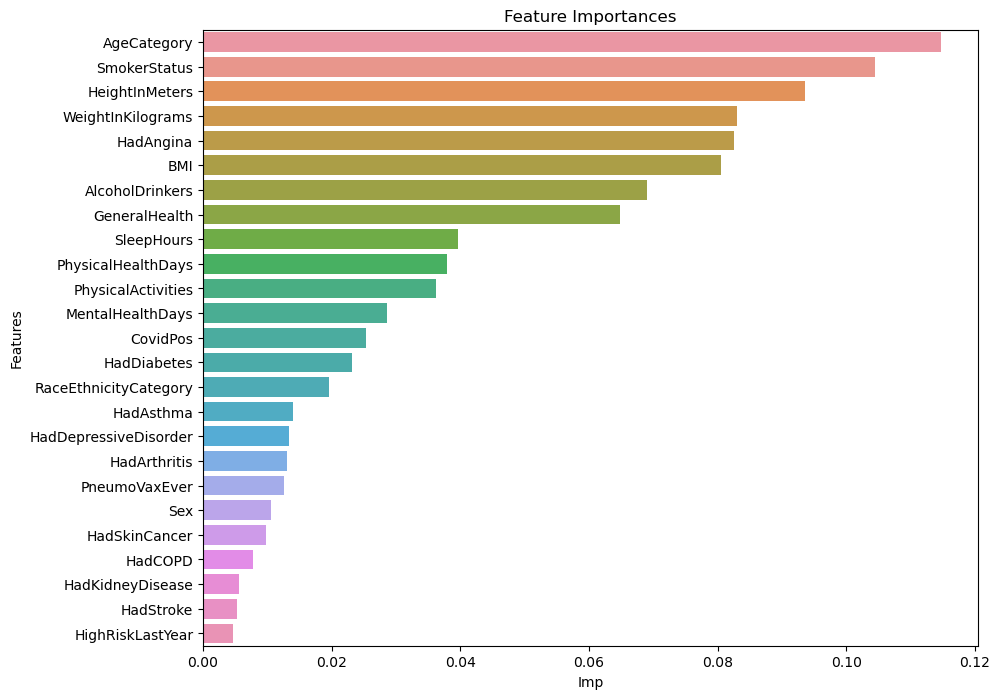

In [119]:
plt.figure(figsize=(10,8))
sns.barplot(x='Imp',y='Features',data=significant_feat)
plt.title('Feature Importances')
plt.show()

# BOOSTING PARAMETERS 1(Xtreme gradient boost)

In [55]:
from xgboost import XGBClassifier

In [56]:
xgb = XGBClassifier()

In [57]:
xgb.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [58]:
pred1_xgb = xgb.predict(X_test)

In [59]:
print(confusion_matrix(y_test, pred1_xgb))
print(classification_report(y_test, pred1_xgb))

[[43680  2893]
 [ 1594  1038]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     46573
           1       0.26      0.39      0.32      2632

    accuracy                           0.91     49205
   macro avg       0.61      0.67      0.63     49205
weighted avg       0.93      0.91      0.92     49205



In [60]:
from catboost import CatBoostClassifier          
cat = CatBoostClassifier ()

In [61]:
cat.fit(X_train_smote, y_train_smote)

Learning rate set to 0.128994
0:	learn: 0.6204671	total: 251ms	remaining: 4m 11s
1:	learn: 0.5688726	total: 348ms	remaining: 2m 53s
2:	learn: 0.5328792	total: 431ms	remaining: 2m 23s
3:	learn: 0.5062986	total: 539ms	remaining: 2m 14s
4:	learn: 0.4878761	total: 653ms	remaining: 2m 9s
5:	learn: 0.4745642	total: 750ms	remaining: 2m 4s
6:	learn: 0.4617053	total: 854ms	remaining: 2m 1s
7:	learn: 0.4486623	total: 952ms	remaining: 1m 58s
8:	learn: 0.4402851	total: 1.05s	remaining: 1m 55s
9:	learn: 0.4331690	total: 1.14s	remaining: 1m 53s
10:	learn: 0.4274679	total: 1.22s	remaining: 1m 49s
11:	learn: 0.4119071	total: 1.34s	remaining: 1m 50s
12:	learn: 0.4063316	total: 1.42s	remaining: 1m 48s
13:	learn: 0.4024597	total: 1.53s	remaining: 1m 47s
14:	learn: 0.3977427	total: 1.62s	remaining: 1m 46s
15:	learn: 0.3939618	total: 1.71s	remaining: 1m 45s
16:	learn: 0.3903803	total: 1.82s	remaining: 1m 45s
17:	learn: 0.3778003	total: 1.93s	remaining: 1m 45s
18:	learn: 0.3752046	total: 2.01s	remaining: 1m

In [62]:
pred_cat = cat.predict(X_test)
print(confusion_matrix(y_test, pred_cat))
print(classification_report(y_test, pred_cat))

[[44827  1746]
 [ 1741   891]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     46573
           1       0.34      0.34      0.34      2632

    accuracy                           0.93     49205
   macro avg       0.65      0.65      0.65     49205
weighted avg       0.93      0.93      0.93     49205



# GRADIENT BOOSTING

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

In [64]:
model.fit(X_train_smote, y_train_smote)

GradientBoostingClassifier()

In [65]:
pred_gb = model.predict(X_test)
pred_gb

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
print(confusion_matrix(y_test, pred_gb))

[[40629  5944]
 [ 1070  1562]]


In [67]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       0.97      0.87      0.92     46573
           1       0.21      0.59      0.31      2632

    accuracy                           0.86     49205
   macro avg       0.59      0.73      0.61     49205
weighted avg       0.93      0.86      0.89     49205



# FEATURE IMPORTANCE

In [74]:
# Initialize and train Lasso Regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_smote, y_train_smote)

Lasso(alpha=0.1)

In [75]:
# Predict on the test set
pred_lasso = lasso.predict(X_test)

In [76]:
# Convert predictions to binary (0 or 1)
pred_lasso_bin = [1 if pred >= 0.5 else 0 for pred in pred_lasso]

In [77]:
# Evaluate the Lasso model
print("Lasso Regression Confusion Matrix:")
print(confusion_matrix(y_test, pred_lasso_bin))

Lasso Regression Confusion Matrix:
[[35630 10943]
 [  696  1936]]


In [78]:
print("Lasso Regression Classification Report:")
print(classification_report(y_test, pred_lasso_bin))

Lasso Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.77      0.86     46573
           1       0.15      0.74      0.25      2632

    accuracy                           0.76     49205
   macro avg       0.57      0.75      0.55     49205
weighted avg       0.94      0.76      0.83     49205



# BAGGING

In [79]:
from sklearn.ensemble import BaggingClassifier

In [80]:
# Initialize a Random Forest classifier as the base estimator
base_estimator = RandomForestClassifier(n_estimators=100, random_state=42)

In [81]:
# Initialize the Bagging classifier with the Random Forest base estimator
bagging_clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=42)


In [82]:
# Fit the Bagging classifier to the training data
bagging_clf.fit(X_train, y_train)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=RandomForestClassifier(random_state=42),
                  random_state=42)

In [83]:
# Make predictions on the test data
y_pred4 = bagging_clf.predict(X_test)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


In [84]:
print(confusion_matrix(y_test, y_pred4))

[[46428   145]
 [ 2467   165]]


In [85]:
print(classification_report(y_test, y_pred4))   #overfit

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     46573
           1       0.53      0.06      0.11      2632

    accuracy                           0.95     49205
   macro avg       0.74      0.53      0.54     49205
weighted avg       0.93      0.95      0.93     49205

